## Web Scraping in Python Zero to Hero
# LetsUpgrade
### DAY 1

In [ ]:
!pip install requests bs4
!pip install pprintpp

In [1]:
from bs4 import BeautifulSoup
from pprint import pprint

import requests
import pandas as pd
from collections import defaultdict

In [2]:
Url = "https://www.python.org/events/"
Request = requests.get(Url)

In [3]:
# Checking the Status Code of https://www.python.org/events/
print("Status Code -",Request.status_code)

Status Code - 200


In [4]:
# Text Function give the entire Web Page for you
print(Request.text)

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">
    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="

In [5]:
# html.parser, parser helps to fetch or retuive relaive information out of the File/HTML path
Soup = BeautifulSoup(Request.text, "html.parser")

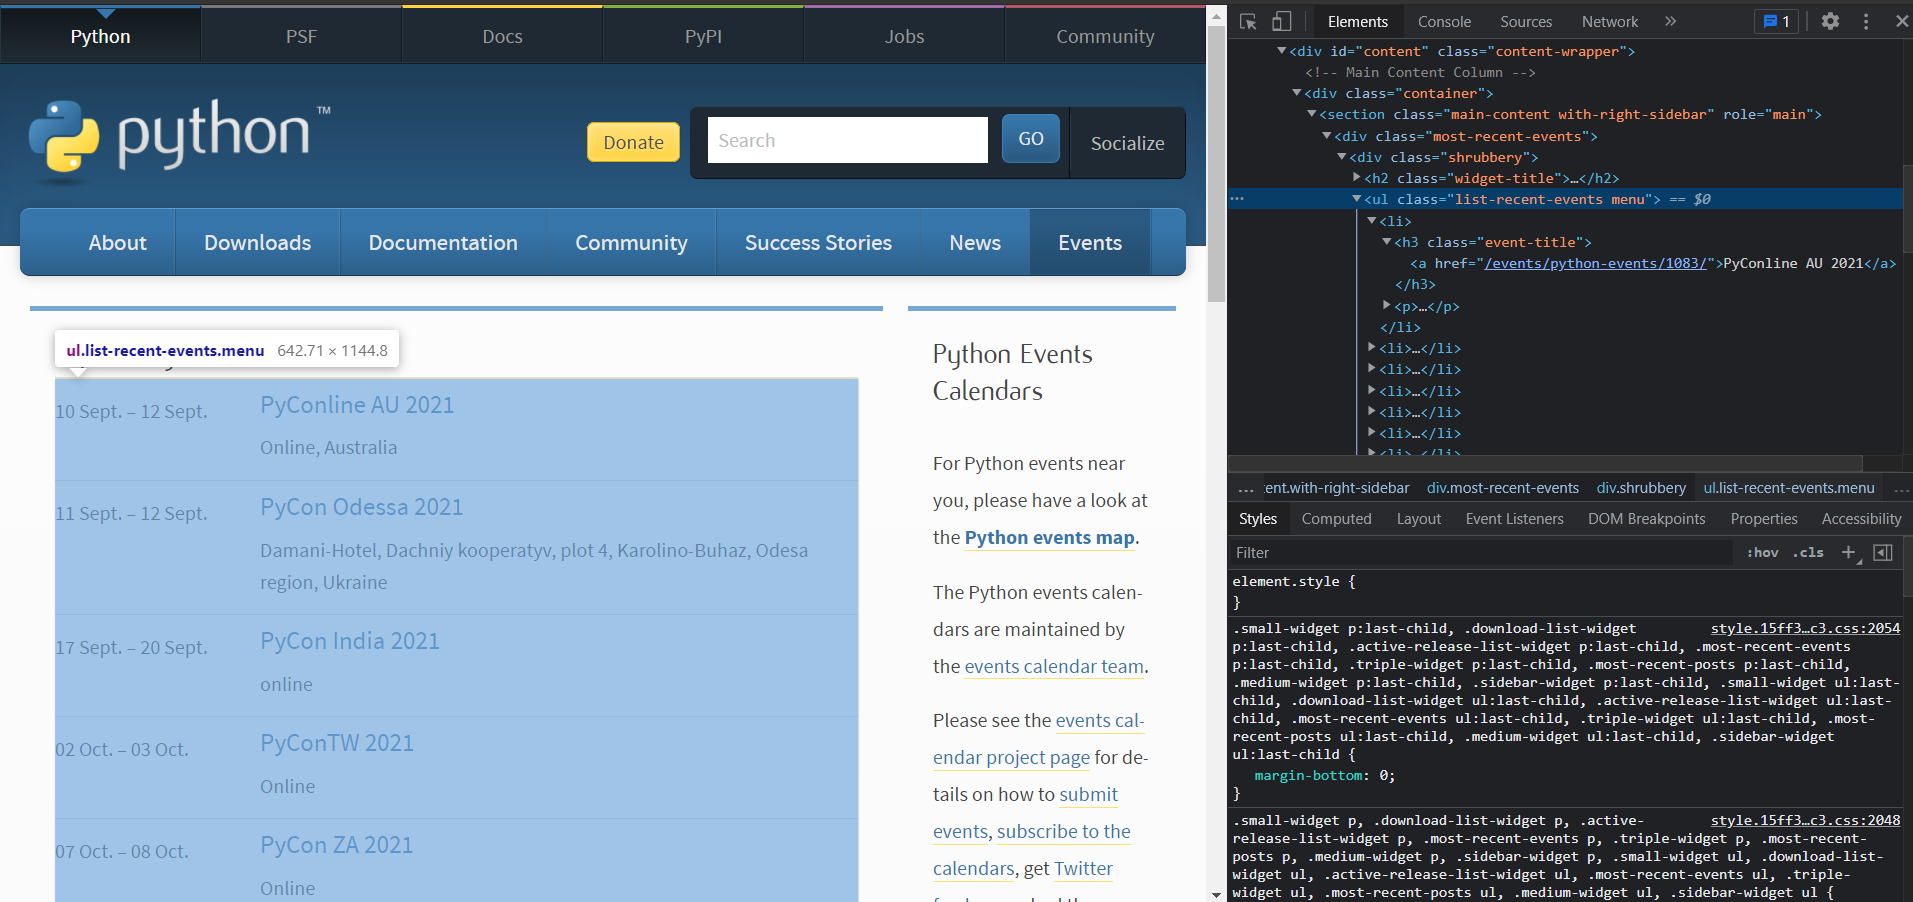

In [7]:
# Traget is ul Element 
Event_Url = Soup.find("ul",{"class":"list-recent-events"})

# print(Event_Url)

In [ ]:
# Traget is ul Element 
Event_Url_Li = Soup.find("ul",{"class":"list-recent-events"}).findAll("li")  # Finding all li element from ui(Target Elemnt) 

# print(Event_Url_Li)

In [ ]:
Detalis = defaultdict(list)

In [ ]:
# How it actually work
Event = Event_Url_Li[0]
# Event Name
print("Event Name")
print(Event.h3.text)

Event Name
PyConline AU 2021


In [ ]:
# For Location
# Target Variable is Location
Event_Loaction = Event.find("span",{"class":"event-location"})
# Loaction
print("Event Loaction")
print(Event_Loaction.text)

Event Loaction
Online, Australia


In [ ]:
# For Datw
# Target Variable is Date
Event_Date = Event.find("time")
# Date
print("Event Date")
print(Event_Date.text)

Event Date
10 Sept. – 12 Sept.  2021


In [ ]:
for I in Event_Url_Li:
  Title = I.h3.text
  Location = I.find("span",{"class":"event-location"}).text
  Date = I.find("time").text

  # Upcoming Event is the Heading, Can be anyting Relaive 
  Detalis["Upcoming Events"].append(Title)
  Detalis["Events Location"].append(Location)
  Detalis["Events Date"].append(Date)

In [ ]:
Detalis

defaultdict(list,
            {'Events Date': ['10 Sept. – 12 Sept.  2021',
              '11 Sept. – 12 Sept.  2021',
              '17 Sept. – 20 Sept.  2021',
              '02 Oct. – 03 Oct.  2021',
              '07 Oct. – 08 Oct.  2021',
              '21 Oct. – 22 Oct.  2021',
              '05 Nov. – 07 Nov.  2021',
              '19 Nov. – 23 Nov.  2021',
              '24 Nov. 2021',
              '17 Feb. – 19 Feb.  2022',
              '18 Feb. – 20 Feb.  2022',
              '02 June – 05 June  2022',
              '11 July – 17 July  2022',
              '16 Sept. – 20 Sept.  2022'],
             'Events Location': ['Online, Australia',
              'Damani-Hotel, Dachniy kooperatyv, plot 4, Karolino-Buhaz, Odesa region, Ukraine',
              'online',
              'Online',
              'Online',
              'online',
              'On line',
              'Bangkok, Thailand and online',
              'Online (Israel)',
              '',
              'Ōtautahi/Ch

In [ ]:
pd.DataFrame(Detalis)

,Upcoming Events,Events Location,Events Date
0,PyConline AU 2021,"Online, Australia",10 Sept. – 12 Sept. 2021
1,PyCon Odessa 2021,"Damani-Hotel, Dachniy kooperatyv, plot 4, Karo...",11 Sept. – 12 Sept. 2021
2,PyCon India 2021,online,17 Sept. – 20 Sept. 2021
3,PyConTW 2021,Online,02 Oct. – 03 Oct. 2021
4,PyCon ZA 2021,Online,07 Oct. – 08 Oct. 2021
5,PyCon Sweden 2021,online,21 Oct. – 22 Oct. 2021
6,PyCon Chile,On line,05 Nov. – 07 Nov. 2021
7,PyCon APAC 2021,"Bangkok, Thailand and online",19 Nov. – 23 Nov. 2021
8,Xtreme Python,Online (Israel),24 Nov. 2021
9,PyCon Namibia 2022,,17 Feb. – 19 Feb. 2022


In [ ]:
def Get_upcoming_Python_Event(Url):
  Request = requests.get(Url)
  # html.parser, parser helps to fetch or retuive relaive information out of the File/HTML path
  Soup = BeautifulSoup(Request.text, "html.parser")
  # Traget is ul Element 
  Event_Url_Li = Soup.find("ul",{"class":"list-recent-events"}).findAll("li")  # Finding all li element from ui(Target Elemnt) 


  Detalis = defaultdict(list)

  for I in Event_Url_Li:
    Title = I.h3.text
    Location = I.find("span",{"class":"event-location"}).text
    Date = I.find("time").text

    # Upcoming Event is the Heading, Can be anyting Relaive 
    Detalis["Upcoming Events"].append(Title)
    Detalis["Events Location"].append(Location)
    Detalis["Events Date"].append(Date)
  
  return pd.DataFrame(Detalis)

In [ ]:
Df = Get_upcoming_Python_Event(Url)

In [ ]:
Df.head()

,Upcoming Events,Events Location,Events Date
0,PyConline AU 2021,"Online, Australia",10 Sept. – 12 Sept. 2021
1,PyCon Odessa 2021,"Damani-Hotel, Dachniy kooperatyv, plot 4, Karo...",11 Sept. – 12 Sept. 2021
2,PyCon India 2021,online,17 Sept. – 20 Sept. 2021
3,PyConTW 2021,Online,02 Oct. – 03 Oct. 2021
4,PyCon ZA 2021,Online,07 Oct. – 08 Oct. 2021


In [ ]:
Df.to_csv("Web Scraping Day_1")

## Downloading the Images

In [ ]:
import shutil

Url_1 = "https://xkcd.com/"

for I in range(10):
  Request_1 = requests.get(f'{Url_1}/{I+1}')
  print("Status Code -",Request_1.status_code)
  #print(Request_1.text)

  # html.parser, parser helps to fetch or retuive relaive information out of the File/HTML path
  Soup_1 = BeautifulSoup(Request_1.text, 'html.parser')

  # Traget is div Element 
  # Finding all img element from ui(Target Elemnt) 
  Img_Url = Soup_1.find('div',{'id':'comic'}).find("img")

  Img_Base = Img_Url.attrs["src"]  # Every Img (attrs)Attritibute has a source(src)

  Url_to_Img = Url_1 +Img_Base
#  print(Url_to_Img)

  # Use 2 Request, one is for URL & 2nd one is for Request URL for Image 
  Req_1 = requests.get(Url_to_Img, stream= True)
  if Req_1.status_code == 200:
    print("Downloading yhis URL -", Url_to_Img)
    with open(f'file_{I +1}.jpg',"wb") as f:
      Req_1.raw.decode_content = True
      shutil.copyfileobj(Req_1.raw,f)

Status Code - 200
Status Code - 200
Status Code - 200
Status Code - 200
Status Code - 200
Status Code - 200
Status Code - 200
Status Code - 200
Status Code - 200
Status Code - 200
